## Calculo do drawdown

Usamos simulação de Monte Carlo para estimar o drawdown médio e máximo (definido como o dd que ocorre 5% dos casos) para uma estratégia.

Da série histórica, que está no arquivo returns.csv extraímos a taxa de acerto (winrate) e a razão retorno:risco (rr). Usaremos apenas essas duas informações na simulação.

Na simulação: sorteamos números (pseudo)aleatórios entre 0 e 1; se for menor que winrate consideramos um ganho em uma unidade (+1); caso contrário, temos a perda de uma unidade (-1).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

returns = pd.read_csv('return.csv')

In [4]:
cumulativo = returns['Return'].cumsum()

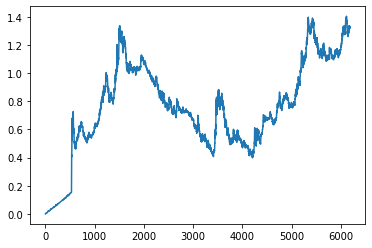

In [5]:
plt.plot(cumulativo)

In [6]:
loss = returns[returns['Return'] <= 0]
profit = returns[returns['Return'] > 0]

winrate = round((len(profit)/(len(profit)+len(loss))),2)
lossrate = 1 - winrate

rr = round(-profit.mean()/loss.mean(),2)[0]

In [7]:
montecarlo = [[rr if np.random.uniform(0,1,len(returns))[j] <= winrate else -1 for j in range(1,len(returns)-1)] for i in range(1,1000)]


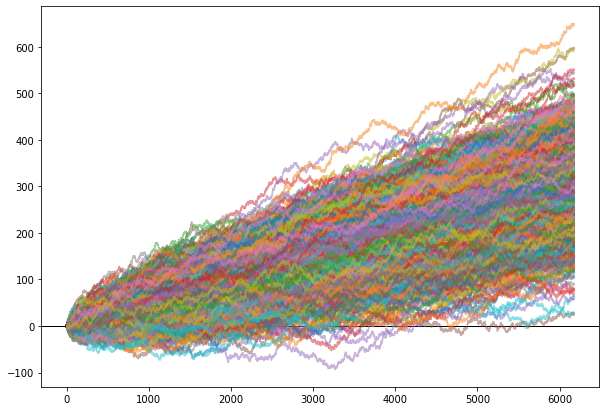

In [12]:
result = pd.DataFrame(montecarlo).transpose()


plt.subplots(figsize=(10,7))
plt.axhline(y=0,linewidth=1, color='#000000')
plt.plot(result.cumsum(), alpha = 0.5)
plt.show()

In [9]:
drawdown = result.cumsum() - result.cumsum().cummax()
maxdd = -drawdown.min()

**Drawdown Médio**

In [10]:
maxdd.mean()

47.59168168168176

**Drawdown Máximo**

In [11]:
maxdd.quantile(.95)

73.48500000000008